In [1]:
#hidden layer 5개 with 70 node, epoch=200  with earlystopping for overfitting
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
df=pd.read_csv(r"C:\Juneinter\aaaaaa.csv")

In [3]:
df

,Series Name,General government final consumption expenditure (% of GDP),Gross fixed capital formation (% of GDP),Population growth (annual %),Trade (% of GDP),"Inflation, consumer prices (annual %)",debt,class,GDP growth (annual %)
0,1970 [YR1970],9.900530,25.862316,2.184174,32.581938,15.950342,11.4120,2,9.997317
1,1971 [YR1971],10.194274,23.376926,1.971324,35.720735,13.511704,15.6230,2,10.454693
2,1972 [YR1972],10.488755,21.475187,1.875999,38.076905,11.688986,19.1389,1,7.150715
3,1973 [YR1973],8.909041,24.362020,1.768293,51.633264,3.221029,18.4370,2,14.827554
4,1974 [YR1974],9.648600,27.256691,1.712705,55.611112,24.304195,19.7190,2,9.460873
5,1975 [YR1975],11.149822,27.280083,1.682000,54.066120,25.249258,22.1723,1,7.863512
6,1976 [YR1976],10.867122,26.439653,1.596559,53.947770,15.327329,21.3910,2,13.115159
7,1977 [YR1977],10.798421,29.385053,1.559039,53.939731,10.096663,21.4720,2,12.277661
8,1978 [YR1978],10.022739,33.656901,1.519197,54.163153,14.460288,19.1950,2,10.774491
9,1979 [YR1979],9.969304,34.618811,1.516875,54.386711,18.323500,16.2223,1,8.625632


In [4]:
x_data=df.iloc[:,1:7].values
y_data=df.iloc[:,[7]].values

def MinMaxScaler(data):
    numerator=data-np.min(data,0)
    denominator=np.max(data,0)-np.min(data,0)
    return numerator/(denominator+1e-7)

In [5]:
print(x_data.shape)
print(y_data.shape)

(49, 6)
(49, 1)


In [6]:
x_data=MinMaxScaler(x_data)
print(x_data)

#y_data=tf.one_hot(y_data, depth=3)
#y_data=y_data.numpy().reshape([-1,3])
y_data=np.array(y_data, np.float32)
print(y_data)

[[0.1381114  0.24469354 0.99999995 0.         0.54460101 0.1156229 ]
 [0.1790291  0.10607012 0.89207334 0.04054345 0.45747998 0.25740741]
 [0.22004953 0.         0.84373878 0.0709778  0.39236286 0.37578788]
 [0.         0.16101409 0.78912568 0.24608357 0.0898427  0.35215488]
 [0.10301829 0.32246527 0.76093991 0.29746493 0.84304482 0.39531986]
 [0.31213425 0.32376996 0.74537063 0.27750847 0.87680745 0.47792256]
 [0.27275488 0.27689468 0.70204719 0.27597975 0.52234369 0.45161616]
 [0.26318508 0.44117535 0.68302293 0.27587591 0.33547668 0.45434343]
 [0.15513482 0.67943904 0.66282054 0.27876183 0.49136841 0.37767677]
 [0.14769144 0.73308986 0.66164324 0.2816495  0.62938278 0.27758586]
 [0.43996436 0.64351673 0.6827305  0.42627177 1.         0.37958586]
 [0.46281864 0.42931516 0.68361344 0.44665883 0.73756441 0.39435017]
 [0.42264053 0.46745201 0.67614177 0.35763688 0.23166559 0.45876094]
 [0.32997094 0.50027969 0.64001431 0.32890478 0.09697297 0.41464646]
 [0.25200712 0.46937912 0.51821967

In [7]:
x_train, x_test, y_train, y_test=train_test_split(x_data, y_data, test_size=0.3, random_state=2020)
print(x_train.shape)   #train data size=21
print(x_test.shape)    #test data size=8
print(y_train.shape)

(34, 6)
(15, 6)
(34, 1)


In [8]:
model=Sequential()
model.add(Dense(70, activation="relu", input_dim=6))
model.add(Dense(70, activation="relu"))
model.add(Dense(70, activation="relu"))
model.add(Dense(70, activation="relu"))
model.add(Dense(70, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 70)                490       
_________________________________________________________________
dense_1 (Dense)              (None, 70)                4970      
_________________________________________________________________
dense_2 (Dense)              (None, 70)                4970      
_________________________________________________________________
dense_3 (Dense)              (None, 70)                4970      
_________________________________________________________________
dense_4 (Dense)              (None, 70)                4970      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 213       
Total params: 20,583
Trainable params: 20,583
Non-trainable params: 0
____________________________________________________

In [9]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
es=EarlyStopping(monitor="val_loss", mode="min", patience=15)
history=model.fit(x_train, y_train, epochs=200, validation_data=(x_test, y_test), verbose=2, callbacks=[es])

Train on 34 samples, validate on 15 samples
Epoch 1/200
34/34 - 1s - loss: 1.0945 - accuracy: 0.3824 - val_loss: 1.0756 - val_accuracy: 0.4667
Epoch 2/200
34/34 - 0s - loss: 1.0803 - accuracy: 0.4412 - val_loss: 1.0725 - val_accuracy: 0.6000
Epoch 3/200
34/34 - 0s - loss: 1.0733 - accuracy: 0.5882 - val_loss: 1.0675 - val_accuracy: 0.4667
Epoch 4/200
34/34 - 0s - loss: 1.0650 - accuracy: 0.5882 - val_loss: 1.0601 - val_accuracy: 0.5333
Epoch 5/200
34/34 - 0s - loss: 1.0577 - accuracy: 0.5588 - val_loss: 1.0540 - val_accuracy: 0.5333
Epoch 6/200
34/34 - 0s - loss: 1.0494 - accuracy: 0.5588 - val_loss: 1.0476 - val_accuracy: 0.5333
Epoch 7/200
34/34 - 0s - loss: 1.0425 - accuracy: 0.5588 - val_loss: 1.0378 - val_accuracy: 0.5333
Epoch 8/200
34/34 - 0s - loss: 1.0339 - accuracy: 0.5588 - val_loss: 1.0263 - val_accuracy: 0.5333
Epoch 9/200
34/34 - 0s - loss: 1.0243 - accuracy: 0.5588 - val_loss: 1.0135 - val_accuracy: 0.5333
Epoch 10/200
34/34 - 0s - loss: 1.0134 - accuracy: 0.5588 - val_l

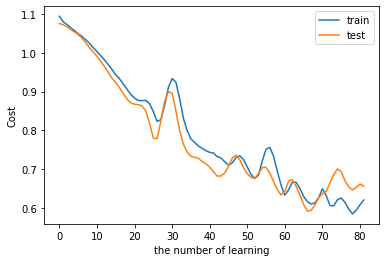

In [10]:
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="test")
plt.xlabel("the number of learning")
plt.ylabel("Cost")
plt.legend()
plt.show()

In [11]:
train_acc=model.evaluate(x_train, y_train, verbose=0)
print("train accuracy:", train_acc[1])
test_acc=model.evaluate(x_test, y_test, verbose=0)
print("test accuracy:", test_acc[1])

train accuracy: 0.64705884
test accuracy: 0.73333335


In [29]:
x_data_to_predict = [[17.03, 31.5579, 0.2, 68.6, 0.4, 38.1]]

prediction=model.predict(x_data_to_predict)
print(np.argmax(prediction))

0


In [28]:
x_1998=[[11.83477, 30.99047, 0.721865, 69.9877, 7.51334, 14.197]]

prediction=model.predict(x_1998)
print(np.argmax(prediction))

0
